In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

In [247]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [248]:
data.shape

(1460, 81)

In [249]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [250]:
from sklearn.model_selection import train_test_split
data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

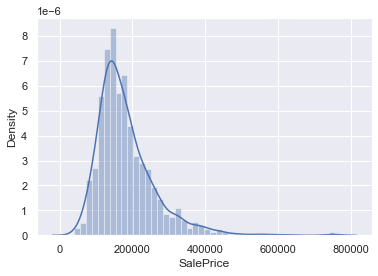

In [251]:
sns.distplot(y_train)

In [252]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета
# TO DO

$$\text{RMSE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} (y_i - a(x_i))^2}$$

In [253]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [254]:
num_cols = X.select_dtypes(include=np.number).columns.tolist()

In [255]:
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].median())
X_test[num_cols] = X_test[num_cols].fillna(X_test[num_cols].median())

In [256]:
model1 = LinearRegression()
model1.fit(X_train[num_cols], y_train)

LinearRegression()

In [257]:
model2 = Ridge()
model2.fit(X_train[num_cols], y_train)

Ridge()

In [258]:
model3 = Lasso()
model3.fit(X_train[num_cols], y_train)

Lasso()

In [259]:
# Определите RMSE через функцию sklearn.metrics.make_scorer
# TO DO
from sklearn.metrics import make_scorer, mean_squared_error
rmse = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
print(rmse(model1, X_test[num_cols], y_test))

-32115.492587140445


In [260]:
print(rmse(model2, X_test[num_cols], y_test))

-32104.41407753693


In [261]:
print(rmse(model3, X_test[num_cols], y_test))

-32114.226794829003


In [262]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

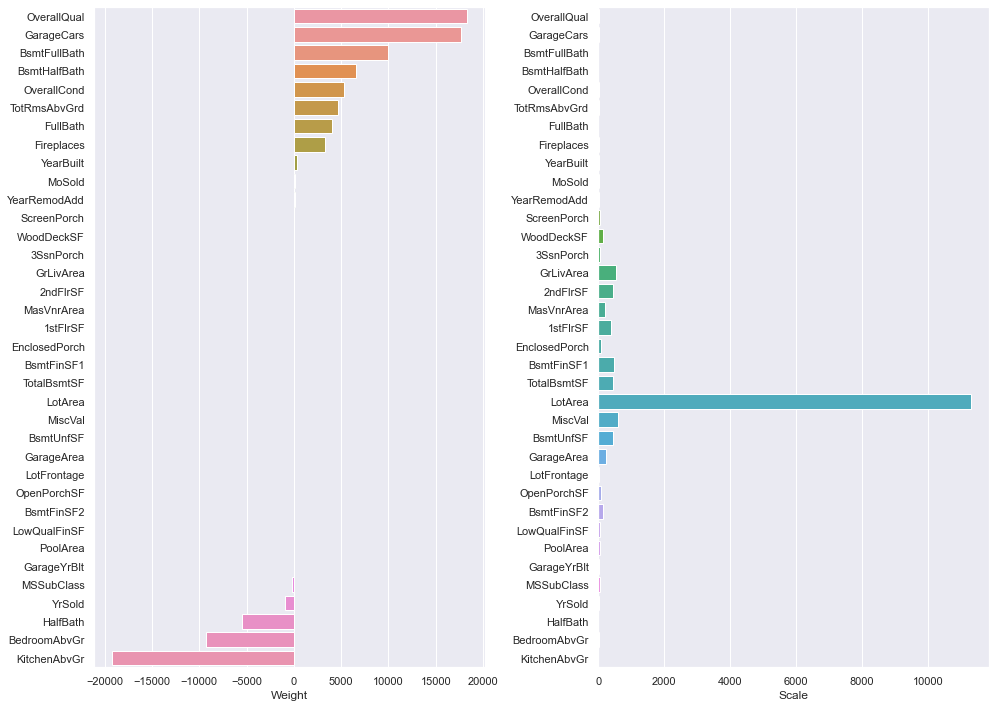

In [263]:
show_weights(num_cols, model.coef_, X_train[num_cols].std())

In [264]:
# Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler
# TO DO

In [265]:
from sklearn.preprocessing import StandardScaler

In [266]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

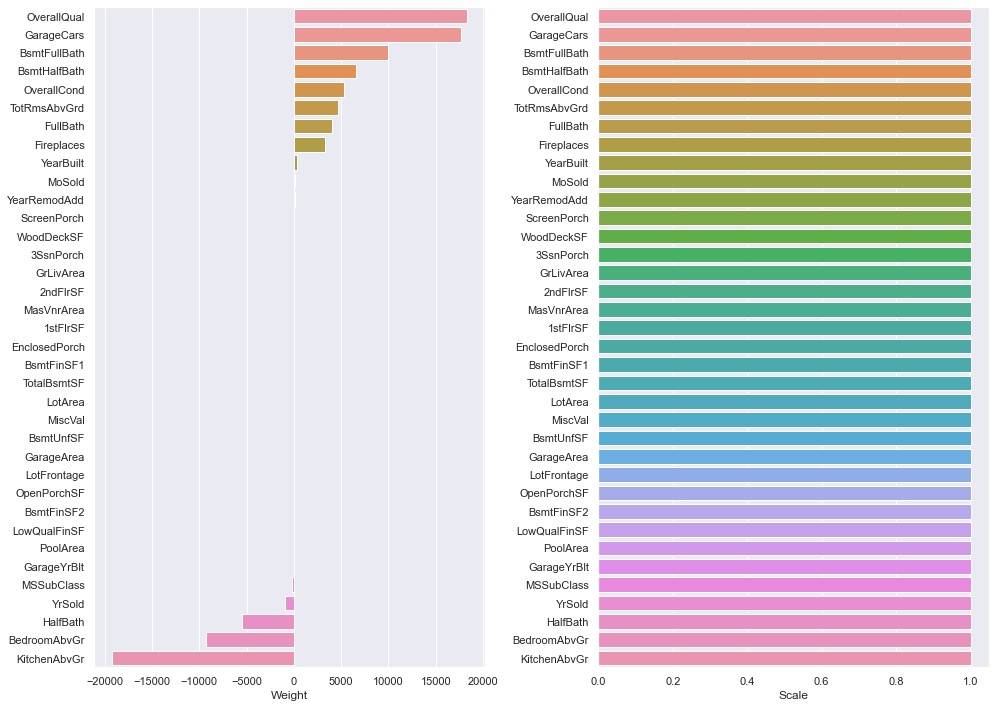

In [267]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=num_cols)
show_weights(num_cols, model.coef_, scales)

In [268]:
# Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV
# TO DO
from sklearn.model_selection import GridSearchCV

In [269]:
grid_model3 = GridSearchCV(model3,[{'alpha':[0.8,0.5, 0.025, 0.026, 0.03, 0.04, 0.05]}], cv=5, verbose=1, scoring=rmse)
grid_model3.fit(X_train[num_cols], y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [0.8, 0.5, 0.025, 0.026, 0.03, 0.04, 0.05]}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=1)

In [270]:
grid_model2 = GridSearchCV(model2,[{'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}], cv=5, verbose=1, scoring=rmse)
grid_model2.fit(X_train[num_cols], y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [200, 230, 250, 265, 270, 275, 290, 300,
                                    500]}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=1)

In [271]:
# Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)
# TO DO
from sklearn.pipeline import Pipeline

In [272]:
pipeline_lasso = Pipeline([('std', StandardScaler()), ('lasso', Lasso(alpha=grid_model3.best_params_['alpha']))])
pipeline_lasso.fit(X_train[num_cols], y_train)

Pipeline(steps=[('std', StandardScaler()), ('lasso', Lasso(alpha=0.8))])

In [273]:
print(rmse(pipeline_lasso, X_test[num_cols], y_test))

-32114.69191658082


In [274]:
pipeline_ridge = Pipeline([('std', StandardScaler()), ('ridge', Ridge(alpha=grid_model2.best_params_['alpha']))])
pipeline_ridge.fit(X_train[num_cols], y_train)
print(rmse(pipeline_ridge, X_test[num_cols], y_test))

-31727.5920346477


In [281]:
categorical = list(X.dtypes[X.dtypes == "object"].index)
X[categorical] = X[categorical].fillna("NotGiven")

In [283]:
X[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
953,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,MnPrv,Shed,WD,Normal
1389,RM,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
827,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
1257,RL,Pave,NotGiven,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,...,NotGiven,NotGiven,NotGiven,NotGiven,Y,NotGiven,NotGiven,NotGiven,WD,Normal
816,RL,Pave,NotGiven,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,RFn,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal


In [284]:
# Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках
from sklearn.preprocessing import OneHotEncoder

In [296]:
column_transformer = OneHotEncoder(sparse=False)
X[categorical] = X[categorical].reshape(len(integer_encoded), 1)
X[categorical] = column_transformer.fit_transform(X[categorical])

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [300]:
column_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(column_transformer.fit_transform(X_train[categorical]))
OH_cols_test = pd.DataFrame(column_transformer.transform(X_test[categorical]))


OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index


num_X_train = X_train.drop(categorical, axis=1)
num_X_test = X_test.drop(categorical, axis=1)


OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)


In [291]:
print("Size before OneHot:", X_train[categorical].shape)
print("Size after OneHot:", column_transformer.transform(X_train[categorical]).shape)

Size before OneHot: (1022, 43)
Size after OneHot: (1022, 258)


In [301]:
# Обучите линейную регрессию с l1 и l2 регуляризаторами
l1 = Lasso()
l1.fit(OH_X_train, y_train)
l2 = Ridge()
l2.fit(OH_X_train, y_train)

Ridge()

In [303]:
# Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV
# TO DO
grid_l1 = GridSearchCV(l1,[{'alpha': np.linspace(0, 10, 20)}], cv=5, verbose=1, scoring=rmse)
grid_l1.fit(OH_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=1)

In [304]:
grid_l2 = GridSearchCV(l2,[{'alpha': np.linspace(0, 500, 50)}], cv=5, verbose=1, scoring=rmse)
grid_l2.fit(OH_X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([  0.        ,  10.20408163,  20.40816327,  30.6122449 ,
        40.81632653,  51.02040816,  61.2244898 ,  71.42857143,
        81.63265306,  91.83673469, 102.04081633, 112.24489796,
       122.44897959, 132.65306122, 142.85714286, 153.06122449,
       163.26530612, 173.46938776, 183.67346939, 193.87755102,
       204.08163265, 214.28571429, 224.48979592, 234.6938...
       285.71428571, 295.91836735, 306.12244898, 316.32653061,
       326.53061224, 336.73469388, 346.93877551, 357.14285714,
       367.34693878, 377.55102041, 387.75510204, 397.95918367,
       408.16326531, 418.36734694, 428.57142857, 438.7755102 ,
       448.97959184, 459.18367347, 469.3877551 , 479.59183673,
       489.79591837, 500.        ])}],
             scoring=make_scorer(mean_squared_error, greater_is_better=False, squared=False),
             verbose=1)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

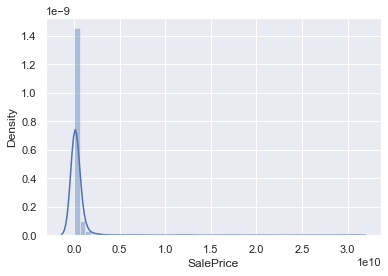

In [309]:
error1 = (y_train - l1.predict(OH_X_train)) ** 2
sns.distplot(error1)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

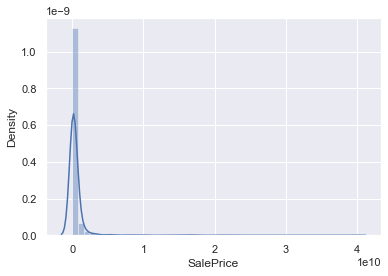

In [307]:
error2 = (y_train - l2.predict(OH_X_train)) ** 2
sns.distplot(error2)

Как видно из гистограммы, есть примеры с очень большими остатками. Попробуем их выбросить из обучающей выборки. Например, выбросим примеры, остаток у которых больше 0.95-квантили.

In [311]:
# Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 
# TO DO
filter_ = error1 < error1.quantile(0.95)

model11 = Lasso(alpha=grid_l1.best_params_['alpha'])
model22 = Ridge(alpha=grid_l2.best_params_['alpha'])

model11.fit(OH_X_train[filter_], y_train[filter_])
model22.fit(OH_X_train[filter_], y_train[filter_])

Ridge(alpha=20.408163265306122)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

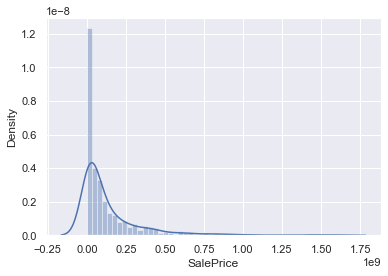

In [313]:
error3 = (y_train[filter_] - model11.predict(OH_X_train[filter_])) ** 2
sns.distplot(error3)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

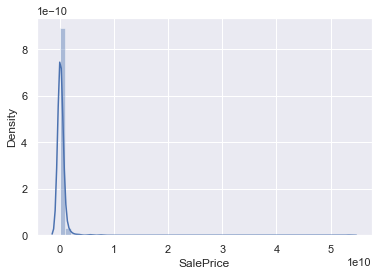

In [314]:
error4 = (y_train[filter_] - model22.predict(OH_X_train[filter_])) ** 2
sns.distplot(error4)

In [315]:
# Получите скор по нашей метрике (RMSE) ниже значения 30000
# TO DO
print((rmse(model11, OH_X_train[filter_], y_train[filter_])))
print((rmse(model22, OH_X_train[filter_], y_train[filter_])))

-11688.725601564222
-18151.273218149247
